# The Perceptron

## Introduction

The Perceptron, developed by Frank Rosenblatt in 1957, is one of the earliest and simplest supervised learning algorithms for binary classification. It serves as the foundation for more complex models like neural networks. The core idea is to find a linear decision boundary (a hyperplane) that separates two classes of data points.

<img src="perceptrondiagram.png" width="600"/>

## Classifying All-Star Caliber Players

In this notebook, we will use the Perceptron algorithm to build a model that classifies whether an NBA player's season was "All-Star caliber." Since our new dataset (`all_seasons.csv`) does not explicitly label All-Stars, we must define it ourselves. We will do this with the following libraries:

1. matplotlib (https://matplotlib.org/)
2. numpy (https://numpy.org/)
3. pandas (https://pandas.pydata.org/)
4. seaborn (https://seaborn.pydata.org/)
5. scikit learn (https://scikit-learn.org/)

We will start by importing the libraries and loading our dataset.

Libraries:

In [122]:
!pip install mlxtend

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_theme()
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

Dataset:

In [123]:
df = pd.read_csv("all_seasons.csv")
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


Now, we will define what it means to have an "all-star caliber" season. For simplicity's sake, we will define it as a season when a player's points per game (`pts`) are within the top 5% of that specific season. This makes sure that the standard for an all-star is kept consistent relative to each unique season.

Create the target variable "all_star_caliber":

In [124]:
all_seasons_results = []
unique_seasons = df['season'].unique()
for season in unique_seasons:
    
    season_df = df[df['season'] == season].copy()
    pts_percentile_95 = season_df['pts'].quantile(0.95)
    season_df['is_all_star'] = (season_df['pts'] >= pts_percentile_95)
    all_seasons_results.append(season_df)

df_with_results = pd.concat(all_seasons_results)

df['all_star_caliber'] = df_with_results['is_all_star'].astype(int)

print("\nExample of identified All-Star Caliber players:")
print(df[df['all_star_caliber'] == 1][['season', 'player_name', 'pts', 'all_star_caliber']].head())


Example of identified All-Star Caliber players:
     season      player_name   pts  all_star_caliber
7   1996-97        Glen Rice  26.8                 1
8   1996-97   Glenn Robinson  21.1                 1
9   1996-97       Grant Hill  21.4                 1
18  1996-97  Hakeem Olajuwon  23.2                 1
22  1996-97      Gary Payton  21.8                 1


Now that we have defined an all-star caliber season, we need to clean up some elements of the dataset. We want to narrow down the factors we take into consideration so that this does not become too overcomplicated. Because all-stars are typically the players who are most important to their team's success and the best individually on each team, we will choose one metric for each of those attributes. 

For importance, we will use usage rate. Usage rate measures how much a team relies on a specific player for offensive and defensive posessions. 

For individual dominance, we will use true shooting percentage. It adjusts a player's overall field goal percentages by taking into account the point values of the field goals they are taking (for example, a player who mostly takes three pointers with the same field goal percentage as a player who mostly takes two pointers will have a higher true shooting percentage, as their shots resulted in more points overall). These stats are considered on the more basic side of "advanced" basketball stats and are not holistic, but they give a good superficial picture for what we are trying to do.

In [125]:
features = ['usg_pct', 'ts_pct']
X = df_clean[features]
y = df_clean['all_star_caliber']

### Predictions and Modeling

Now we will define our Perceptron function.

In [126]:
class Perceptron(object):
    def __init__(self, eta = .5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Then, we will train the model on our dataset.

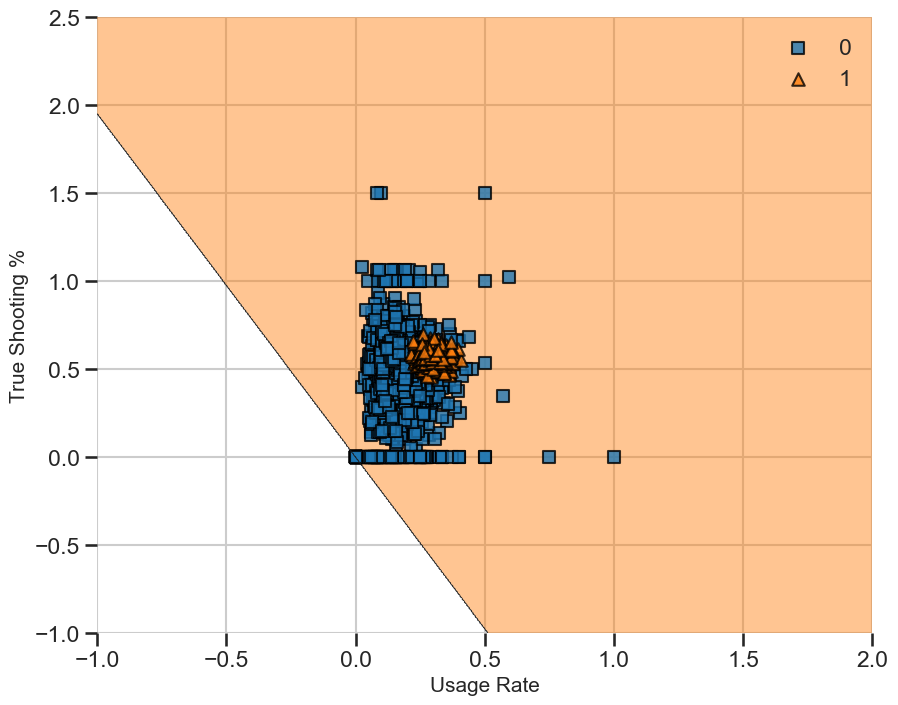

In [127]:
clf = Perceptron(100_000)

X = np.array(X, dtype=float)
y = np.array(y, dtype=int)

clf.train(X, y)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("", fontsize = 18)
plt.xlabel("Usage Rate", fontsize = 15)
plt.ylabel("True Shooting %", fontsize = 15)
plt.show()

Notably from here, we see that the Perceptron model might not be the best for predicting an NBA player's all-star caliber level strictly from the raw data. As we can see from the graph, it does not linearly group the data together very well and places mot of the data into the same quadrant.

We can try standardizing the statistics.

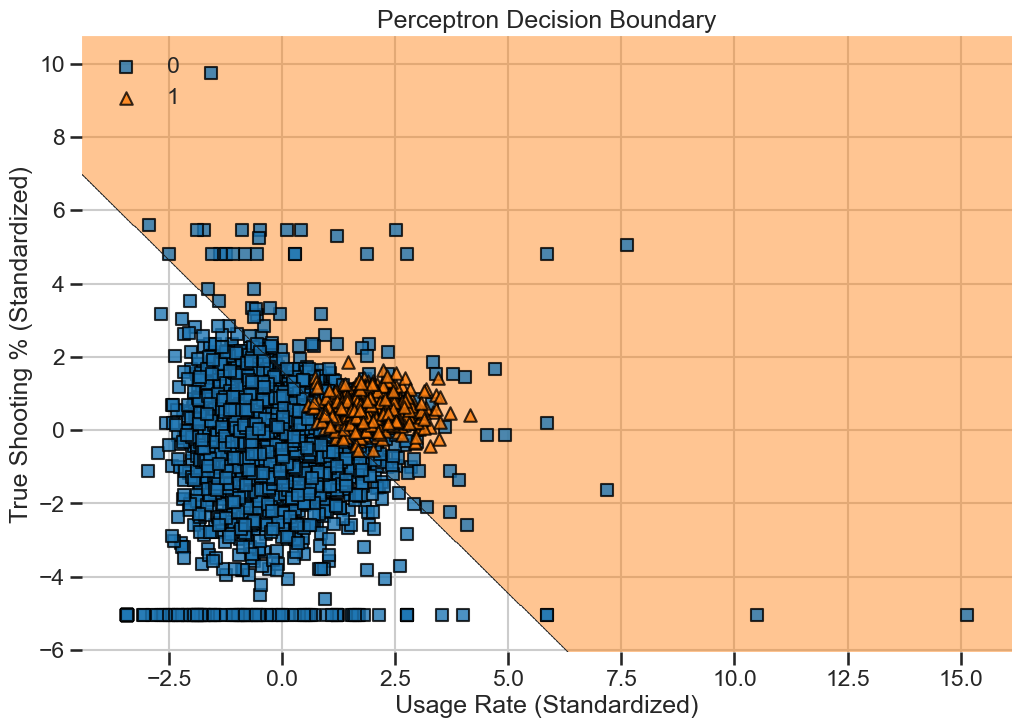

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf2 = Perceptron(100_000)
clf2.train(X_train_scaled, y_train)

plt.figure(figsize=(12, 8))
plot_decision_regions(X_train_scaled, y_train, clf=clf2)
plt.xlabel('Usage Rate (Standardized)')
plt.ylabel('True Shooting % (Standardized)')
plt.legend(loc='upper left')
plt.title('Perceptron Decision Boundary')
plt.show()

After scaling and standardizing, we see it fits a little bit better, though still not ideal. The orange triangles represent all-star caliber players, and the blue square represent non all-star caliber players. We see a vague resemblance to the best fit line, but overall not as representative as we would like.

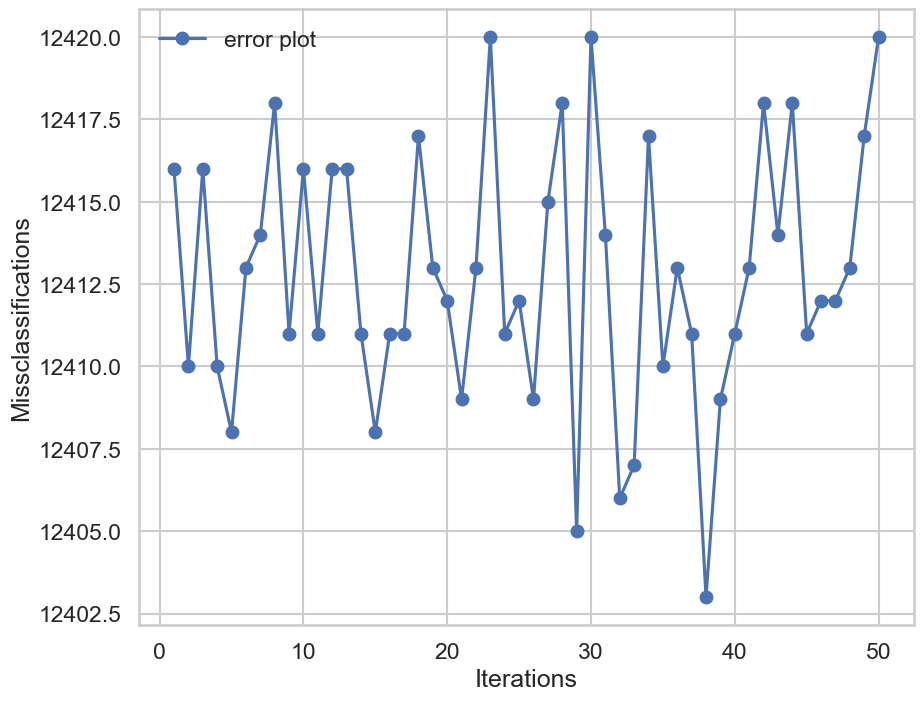

In [129]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

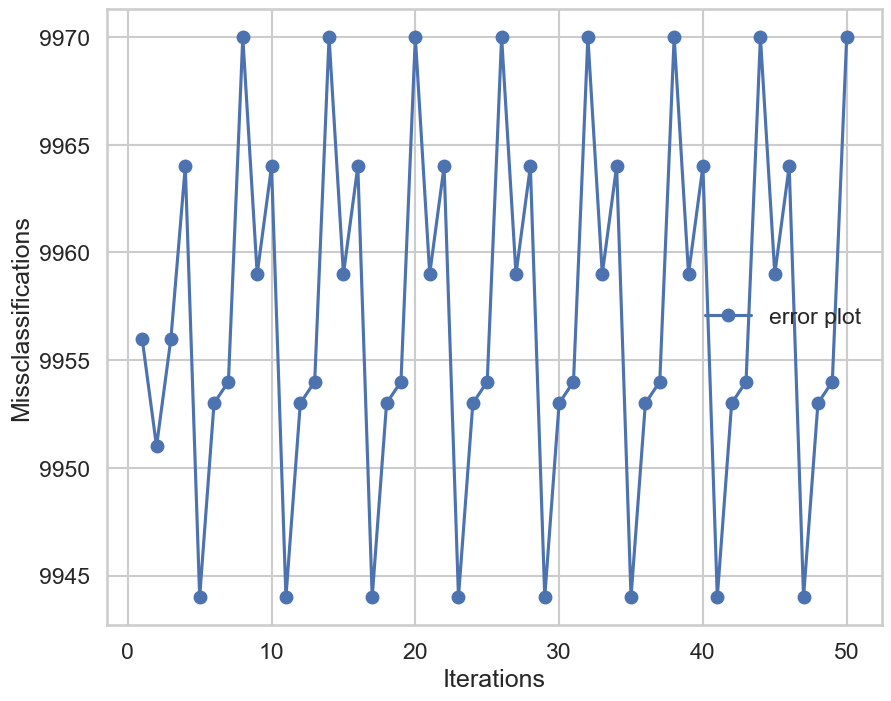

In [130]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf2.errors_)+1), clf2.errors_, 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

### Conclusion

The Perceptron is not very suitable for this dataset due to the high amount of data points and lack of strong overall correlation, as we can see in the error graphs. However it does predict some elements well, in part due to the relatively vague relations of the stats.